In [1]:
#!pip install seaborn numpy matplotlib phonopy phono3py pyyaml
import numpy as np
import seaborn as sns
import pandas as pd
#import phono3py as pn
import yaml as yaml

import matplotlib.pylab as plt
from matplotlib import rcParams
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib.lines import Line2D

rcParams.update({'figure.autolayout': True})
sns.set_style("whitegrid", rc={"axes.edgecolor": "k", "axes.linewidth":2.})
sns.set_style("ticks", {"xtick.major.size":8,"ytick.major.size":8})

sns.set_context("notebook",rc={"grid.linewidth": 0.1,
                            "font.family":"Helvetica", "axes.labelsize":20.,"xtick.labelsize":18.,
                            "ytick.labelsize":18., "legend.fontsize":12.,"title.labelsize":14.}) # https://seaborn.pydata.org/tutorial/aesthetics.html

colors = sns.color_palette("colorblind", 8) #https://seaborn.pydata.org/tutorial/color_palettes.html

display(colors)
# color key: main element = 'k', additional elements = colors[0,1,2,...], fermi = colors[6], kpoints = colors[7]
# have dft='k' 'solid'; gfn1=colors[10] 'dotted'; gfn2=colors[11] 'dashed'

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451)]

Composite TDOS+BS (VASP)

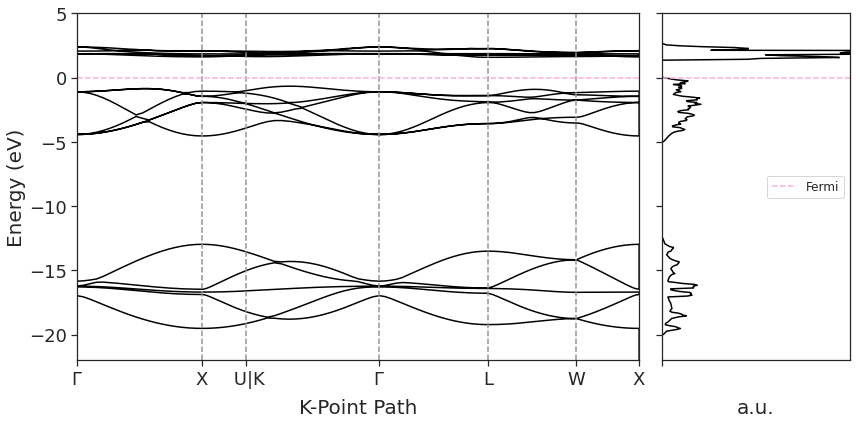

In [2]:
# band structure and density of states
fig, axs = plt.subplots(nrows=1, ncols=2,sharey=True,figsize=(12,6),gridspec_kw={'width_ratios': [3, 1]})
#fig.suptitle('Cerium(IV) Oxide VASP Results',fontsize=18)
plt.subplot(121)
dos = np.array(np.loadtxt('./plot-src/CeO2_VASP_TDOS.dat'))
bands = np.array(np.loadtxt('./plot-src/CeO2_VASP_BAND.dat'))
fermi = ((-1.30344) -1.42856)/2 # vasp says -7.186082, I set to midway between upper peaks

kpts = [[0,0,0],[0,1,0],[0.5,0.75,0.25],[0,0,0],[0.5,0.5,0.5],[0,1,0]]
kpath = [bands[0,0],bands[19,0],bands[39,0],bands[59,0],bands[79,0],bands[99,0],bands[119,0]]
bands_pts = len(bands[:,0])
bands=np.c_[bands, np.zeros(bands_pts)]
for i in range(bands_pts):
    #display(i)
    bands[i,3] = (bands[i,1]+bands[i,2])/2
plt.plot(bands[:,0], bands[:,3]-(fermi), color='black')
plt.xticks(kpath,['$\Gamma$', 'X',' U|K', '$\Gamma$', 'L' ,'W' ,'X'])
plt.yticks(fontsize=18)
plt.vlines(kpath[1:-1],-22,5,color=colors[7],linestyle='dashed')
plt.hlines(0,0,5.12846,color=colors[6],linestyle='dashed',label='fermi')
plt.xlim(0,5.12846)
plt.ylim(-22,5)
plt.xlabel('K-Point Path', labelpad = 10)
plt.ylabel('Energy (eV)', labelpad = 3)
#plt.title('Band Structure')

plt.subplot(122) # not sure how to make less wide
plt.plot((dos[:,1]-dos[:,2])/5, dos[:,0], color='black')
plt.hlines(0,0,20,color=colors[6],linestyle='dashed',label='Fermi')
plt.xticks([0,5],[' ',' '])
plt.xlabel('a.u.',  labelpad = 10)
plt.ylim(-22,5)
plt.xlim(0,4.75)
#plt.title('Density of States')
plt.legend(loc='center right')

plt.savefig('./plot-fig/CeO2_VASP_Composite.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show() #plt.close() #

Composite TDOS+BS (DFTB)

In [3]:
#pending

Composite phonon TDOS+BS (VASP)

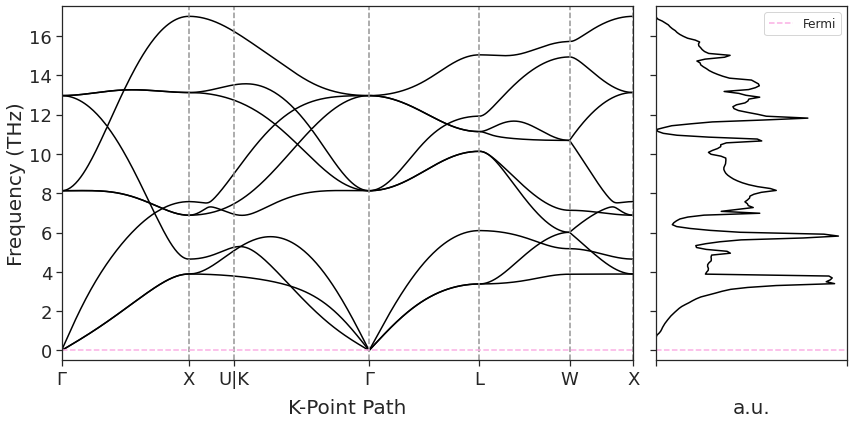

In [4]:
# band structure and density of states
fig, axs = plt.subplots(nrows=1, ncols=2,sharey=True,figsize=(12,6),gridspec_kw={'width_ratios': [3, 1]})
#fig.suptitle('Cerium(IV) Oxide Phonopy VASP Results',fontsize=14)
plt.subplot(121)
dos = np.array(np.loadtxt('./plot-src/CeO2_VASP_phononTDOS.dat'))
bands = np.array(np.loadtxt('./plot-src/CeO2_VASP_phononBAND.dat'))
fermi = 0

# Γ—X—U|K—Γ—L—W—X 
kpath = [bands[0,0],bands[100,0],bands[201,0],bands[302,0],bands[403,0],bands[504,0],bands[605,0]]
plt.plot(bands[:,0], bands[:,1:], color='k')
plt.xticks(kpath,['\u0393','X','U|K','\u0393','L','W','X'])
plt.yticks(fontsize=18)
plt.vlines(kpath,-0.5,17.5,color=colors[7],linestyle='dashed')
plt.hlines(0,bands[0,0],bands[605,0],color=colors[6],linestyle='dashed',label='Fermi')
plt.xlim(0,bands[605,0])
plt.ylim(-0.5,17.5)
plt.xlabel('K-Point Path',  labelpad = 10)
plt.ylabel('Frequency (THz)', labelpad = 3)
#plt.title('Band Structure')

plt.subplot(122) # not sure how to make less wide
plt.plot((dos[:,1]), dos[:,0]-(fermi), color='black')
plt.hlines(0,0,20,color=colors[6],linestyle='dashed',label='Fermi')
plt.xticks([0,1.7],[' ',' '])
plt.xlabel('a.u.',  labelpad = 10)
plt.xlim(0,1.7)
plt.ylim(-0.5,17.5)
#plt.title('Density of States')
plt.legend()

plt.savefig('./plot-fig/CeO2_VASP_phononComposite.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show() #plt.close() #

Composite phonon TDOS+BS (DFTB)

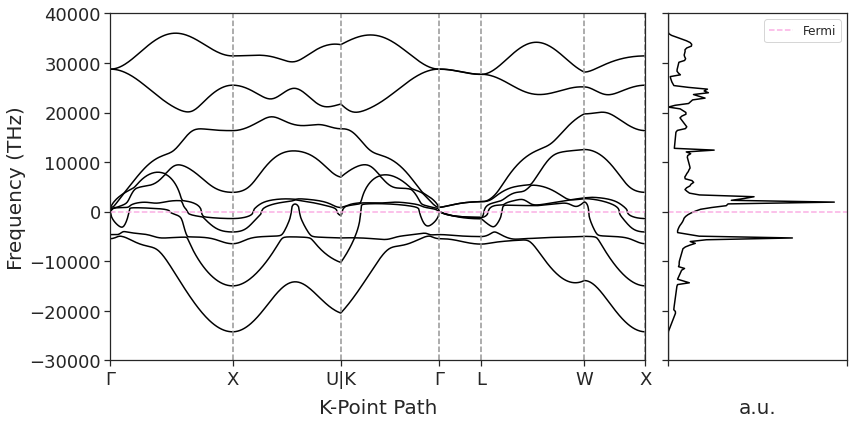

In [5]:
# band structure and density of states
fig, axs = plt.subplots(nrows=1, ncols=2,sharey=True,figsize=(12,6),gridspec_kw={'width_ratios': [3, 1]})
#fig.suptitle('Cerium(IV) Oxide Phonopy DFTB Results',fontsize=14)
plt.subplot(121)
dos = np.array(np.loadtxt('./plot-src/CeO2_DFTB_phononTDOS.dat'))
bands = np.array(np.loadtxt('./plot-src/CeO2_DFTB_phononBAND.dat'))
fermi = 0

# Γ—X—U|K—Γ—L—W—X 
kpath = [bands[0,0],bands[100,0],bands[201,0],bands[302,0],bands[403,0],bands[504,0],bands[605,0]]
plt.plot(bands[:,0], bands[:,1:], color='k')
plt.xticks(kpath,['\u0393','X','U|K','\u0393','L','W','X'])
plt.yticks(fontsize=18)
plt.vlines(kpath,-30000,40000,color=colors[7],linestyle='dashed')
plt.hlines(0,bands[0,0],bands[605,0],color=colors[6],linestyle='dashed',label='Fermi')
plt.xlim(0,bands[605,0])
plt.ylim(-3e4,4e4)
plt.xlabel('K-Point Path',  labelpad = 10)
plt.ylabel('Frequency (THz)', labelpad = 3)
#plt.title('Band Structure')

plt.subplot(122) # not sure how to make less wide
plt.plot((dos[:,1]), dos[:,0]-(fermi), color='black')
plt.hlines(0,0,20,color=colors[6],linestyle='dashed',label='Fermi')
plt.xticks([0,0.0015],[' ',' '])
plt.xlabel('a.u.',  labelpad = 10)
plt.xlim(0,0.0015)
plt.ylim(-3e4,4e4)
#plt.title('Density of States')
plt.legend()

plt.savefig('./plot-fig/CeO2_DFTB_phononComposite.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show() #plt.close() #

TDOS (VASP)

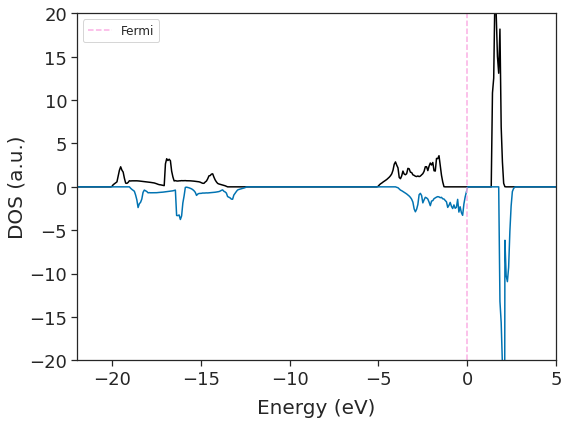

In [6]:
# density of states
dos = np.array(np.loadtxt('./plot-src/CeO2_VASP_TDOS.dat'))
fig = plt.figure(figsize=(8,6))
fermi = 0 #((-1.30344) -1.42856)/2 # vasp says -7.186082, this is fermi used for composite plot
plt.plot(dos[:,0]-fermi, dos[:,1], color='black')
plt.plot(dos[:,0]-fermi, dos[:,2], color=colors[0])
plt.vlines(0,-20,20,color=colors[6],linestyle='dashed',label='Fermi')
plt.xlabel('Energy (eV)',  labelpad = 10)
plt.ylabel('DOS (a.u.)', labelpad = 3)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(-20,20)
plt.xlim(-22,5)
plt.legend()
#plt.title('Cerium(IV) Oxide Density of States Plot (VASP)')
plt.savefig('./plot-fig/CeO2_VASP_TDOS.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()#plt.close() #

PDOS (VASP)

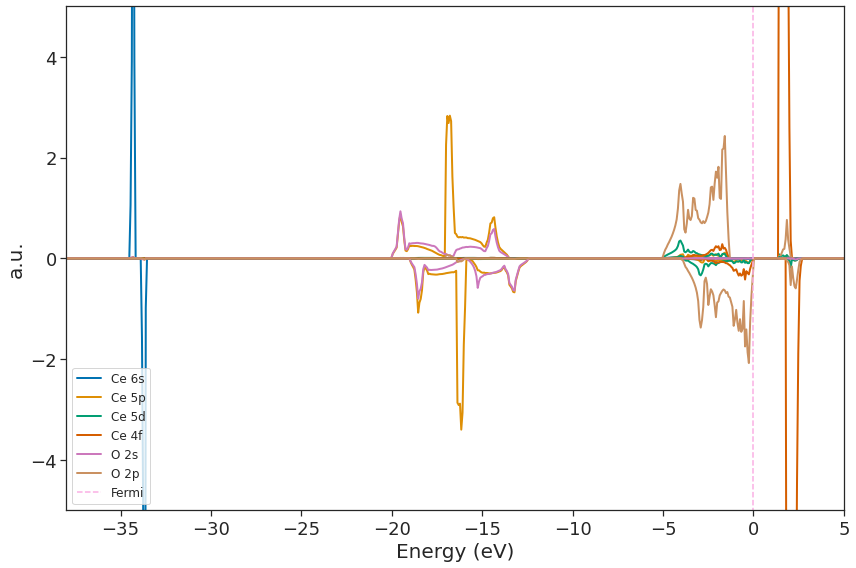

In [7]:
# partial density of state
# get vals
Ce_up_pdos = np.array(np.loadtxt('./plot-src/CeO2_VASP_CeupPDOS.dat'))
Ce_dw_pdos = np.array(np.loadtxt('./plot-src/CeO2_VASP_CedwPDOS.dat'))
O_up_pdos = np.array(np.loadtxt('./plot-src/CeO2_VASP_OupPDOS.dat'))
O_dw_pdos = np.array(np.loadtxt('./plot-src/CeO2_VASP_OdwPDOS.dat'))
fermi = 0 #0.02349
# plot PDOS
fig2 = plt.figure(figsize=(12,8))
#plt.plot(TDOSDFT[:,0]-fermiDFT, TDOSDFT[:,1], color='k',lw=3, label='CeO2 System TOT')
   #Energy           s          py          pz          px         dxy         dyz         dz2         dxz         dx2       tot  
#plt.plot(TDOSDFT[:,0]-fermiDFT, TDOSDFT[:,1], color='k',lw=3, label='Xe DOS DFT')
#plt.plot(PDOSDFT_Ce[:,0]-fermiDFT, PDOSDFT_Ce[:,17], color='grey',lw=3, label='Ce Atom TOT') 
#plt.plot(PDOSDFT_O[:,0]-fermiDFT, PDOSDFT_O[:,17], color='brown',lw=3, label='O Atom TOT') 
plt.plot(Ce_up_pdos[:,0]-fermi, Ce_up_pdos[:,1], color=colors[0], lw=2, label='Ce 6s')
plt.plot(Ce_up_pdos[:,0]-fermi, Ce_up_pdos[:,2]+Ce_up_pdos[:,3]+Ce_up_pdos[:,4], color=colors[1],linestyle='solid',lw=2, label='Ce 5p')
plt.plot(Ce_up_pdos[:,0]-fermi, Ce_up_pdos[:,5]+Ce_up_pdos[:,6]+Ce_up_pdos[:,7]+Ce_up_pdos[:,8]+Ce_up_pdos[:,9], color=colors[2],lw=2, label='Ce 5d') # 0
plt.plot(Ce_up_pdos[:,0]-fermi, Ce_up_pdos[:,10]+Ce_up_pdos[:,11]+Ce_up_pdos[:,12]+Ce_up_pdos[:,13]+Ce_up_pdos[:,14]+Ce_up_pdos[:,15]+Ce_up_pdos[:,16], color=colors[3],lw=2,linestyle='solid', label='Ce 4f') # 0
plt.plot(O_up_pdos[:,0]-fermi, O_up_pdos[:,1], color=colors[4], lw=2, label='O 2s')
plt.plot(O_up_pdos[:,0]-fermi, O_up_pdos[:,2]+O_up_pdos[:,3]+O_up_pdos[:,4], color=colors[5],linestyle='solid',lw=2, label='O 2p')
plt.plot(Ce_dw_pdos[:,0]-fermi, Ce_dw_pdos[:,1], color=colors[0], lw=2)
plt.plot(Ce_dw_pdos[:,0]-fermi, Ce_dw_pdos[:,2]+Ce_dw_pdos[:,3]+Ce_dw_pdos[:,4], color=colors[1],linestyle='solid',lw=2)
plt.plot(Ce_dw_pdos[:,0]-fermi, Ce_dw_pdos[:,5]+Ce_dw_pdos[:,6]+Ce_dw_pdos[:,7]+Ce_dw_pdos[:,8]+Ce_up_pdos[:,9], color=colors[2],lw=2) # 0
plt.plot(Ce_dw_pdos[:,0]-fermi, Ce_dw_pdos[:,10]+Ce_dw_pdos[:,11]+Ce_dw_pdos[:,12]+Ce_dw_pdos[:,13]+Ce_dw_pdos[:,14]+Ce_dw_pdos[:,15]+Ce_dw_pdos[:,16], color=colors[3],lw=2,linestyle='solid') # 0
plt.plot(O_dw_pdos[:,0]-fermi, O_dw_pdos[:,1], color=colors[4], lw=2)
plt.plot(O_dw_pdos[:,0]-fermi, O_dw_pdos[:,2]+O_dw_pdos[:,3]+O_dw_pdos[:,4], color=colors[5],linestyle='solid',lw=2 )
plt.vlines(0,-10,110,color=colors[6],linestyle='dashed', label='Fermi')
plt.xlabel('Energy (eV)')
plt.ylabel('a.u.')
plt.xlim(-38,5) #0,5)
plt.ylim(-5,5)
plt.xticks()
plt.yticks()
plt.legend()
#plt.title('Cerium(IV) Oxide Partial Density of States (VASP)',fontsize=18)
plt.savefig('./plot-fig/CeO2_VASP_PDOS.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()#plt.close() #

Band Structure (VASP)

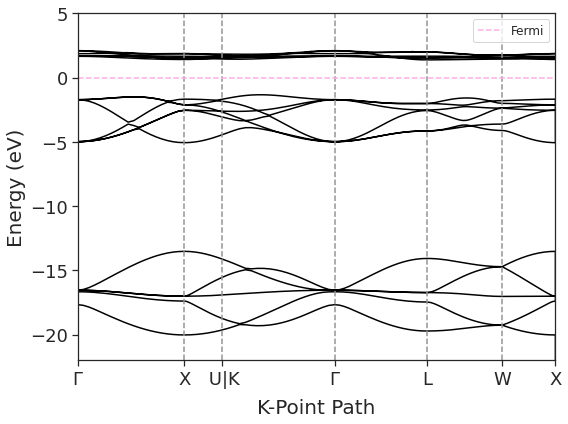

In [8]:
# band structure
bands = np.array(np.loadtxt('./plot-src/CeO2_VASP_BAND.dat'))
fermi = ((-1.30344) -1.42856)/2 # vasp says -7.186082, I set to midway between upper peaks
fig = plt.figure(figsize=(8,6))
# Γ—X—U|K—Γ—L—W—X 
kpts = [[0,0,0],[0,1,0],[0.5,0.75,0.25],[0,0,0],[0.5,0.5,0.5],[0,1,0]]
kpath = [bands[0,0],bands[19,0],bands[39,0],bands[59,0],bands[79,0],bands[99,0],bands[119,0]]
plt.plot(bands[:,0], bands[:,1]-(fermi), color='black')
plt.xticks(kpath,['$\Gamma$', 'X',' U|K', '$\Gamma$', 'L' ,'W' ,'X'])
plt.yticks()
plt.vlines(kpath[1:-1],-22,5,color=colors[7],linestyle='dashed')
plt.hlines(0,0,5.12846,color=colors[6],linestyle='dashed',label='Fermi')
plt.xlim(0,5.12846)
plt.ylim(-22,5)
plt.xlabel('K-Point Path', labelpad = 10)
plt.ylabel('Energy (eV)')
#plt.title('Cerium(IV) Oxide Band Structure Plot', fontsize=14)
plt.legend()
plt.savefig('./plot-fig/CeO2_VASP_BAND.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show() #plt.close() #

Phonon Density of States (VASP)

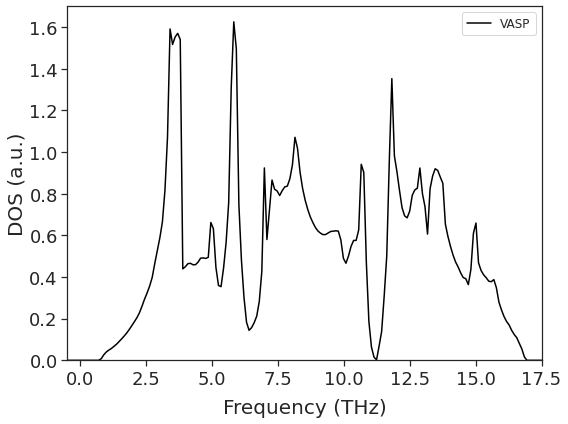

In [9]:
# phonon density of states
fig = plt.figure(figsize=(8,6))
pydos = np.array(np.loadtxt('./plot-src/CeO2_VASP_phononTDOS.dat')) # is fermi significant here? I don't think so
plt.plot(pydos[:,0], pydos[:,1], color='k', label='VASP')
plt.xlabel('Frequency (THz)',  labelpad = 10)
plt.ylabel('DOS (a.u.)', labelpad = 3)
plt.ylim(0,1.7)
plt.xlim(-0.5,17.5)
plt.xticks()
plt.yticks()
plt.legend()
#plt.title('Cerium(IV) Oxide Phonon Density of States Plot (VASP)')
plt.savefig('./plot-fig/CeO2_VASP_phononTDOS.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show() #plt.close() #

Phonon Density of States (DFTB)

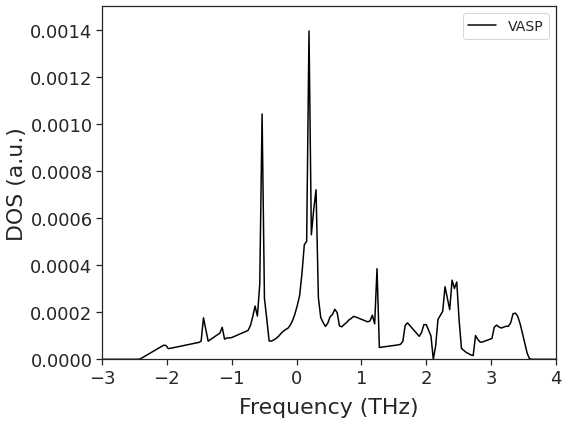

In [10]:
# phonon density of states
fig = plt.figure(figsize=(8,6))
pydos = np.array(np.loadtxt('./plot-src/CeO2_DFTB_phononTDOS.dat')) # is fermi significant here? I don't think so
plt.plot(pydos[:,0]/10000, pydos[:,1], color='k', label='VASP')
plt.xlabel('Frequency (THz)',  labelpad = 10,fontsize=22)
plt.ylabel('DOS (a.u.)', labelpad = 3,fontsize=22)
plt.ylim(0,0.0015)
plt.xlim(-3,4)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=14)
#plt.title('Cerium(IV) Oxide Phonon Density of States Plot (DFTB)', fontsize=14)
plt.savefig('./plot-fig/CeO2_DFTB_phononTDOS.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()# plt.close() #

Superimposed Phonon Density of States (VASP and DFTB)

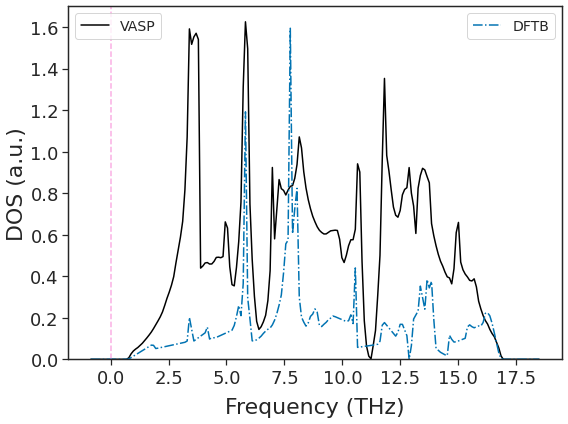

In [11]:
# superimposed phonon DOS plots
# to plot superimposed, normalize one axis, then plot the 'twin' version of the other axis, then hide the extra axis
fig, ax1 = plt.subplots(figsize=(8,6))
VASP_dos = np.array(np.loadtxt('./plot-src/CeO2_VASP_phononTDOS.dat'))
DFTB_dos = np.array(np.loadtxt('./plot-src/CeO2_DFTB_phononTDOS.dat'))
ax1.set_xlabel('Frequency (THz)',  labelpad = 10,fontsize=22)
ax1.set_ylabel('DOS (a.u.)', labelpad = 3,fontsize=22)
ax1.plot(VASP_dos[:,0], VASP_dos[:,1], color='k', label='VASP')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.vlines(0,0,1.7,color=colors[6],linestyle='dashed')
plt.legend(loc=2,fontsize=14)

ax2 = ax1.twiny()  # instantiate a second Axes that shares the same y-axis
ax2.plot(DFTB_dos[:,0], DFTB_dos[:,1]*1142.85, color=colors[0],linestyle='dashdot', label='DFTB')
ax2.tick_params(axis='x')
ax2.get_xaxis().set_visible(False) # hide the extra axes
plt.legend(loc=1,fontsize=14)

plt.ylim(0,1.7)
#plt.title('CeO2 Phonon Superimposed Density of States Plot', fontsize=14)
plt.savefig('./plot-fig/CeO2_Superimposed_phononTDOS.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()#plt.close()#

Phonon Band Structure (VASP)

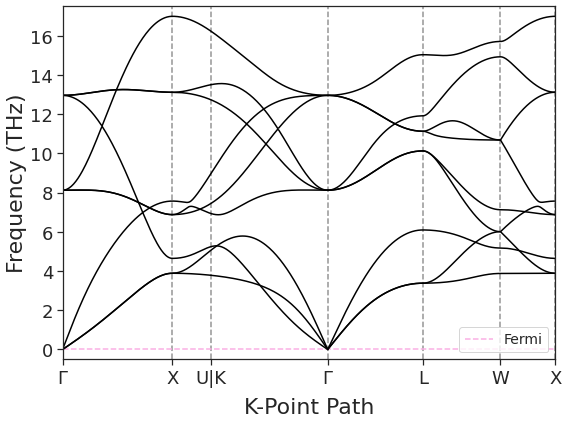

In [12]:
# Phonon Band Structure 
fig = plt.figure(figsize=(8,6))
bands = np.array(np.loadtxt('./plot-src/CeO2_VASP_phononBAND.dat'))
kpath = [bands[0,0],bands[100,0],bands[201,0],bands[302,0],bands[403,0],bands[504,0],bands[605,0]]
plt.xticks(kpath,['\u0393','X','U|K','\u0393','L','W','X'],fontsize=18)
plt.yticks(fontsize=18)
plt.vlines(kpath,-0.5,17.5,color=colors[7],linestyle='dashed')
plt.hlines(0,bands[0,0],bands[605,0],color=colors[6],linestyle='dashed',label='Fermi')
plt.plot(bands[:,0], bands[:,1:], color='k')
plt.xlabel('K-Point Path',  labelpad = 10,fontsize=22)
plt.ylabel('Frequency (THz)', labelpad = 3,fontsize=22)
plt.xlim(0,bands[605,0])
plt.ylim(-0.5,17.5)
plt.legend(fontsize=14)
#plt.title('Cerium(IV) Oxide Phonon Band Structure Plot (DFTB)', fontsize=14)
plt.savefig('./plot-fig/CeO2_VASP_phononBAND.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()#plt.close()#

Phonon Band Structure (DFTB)

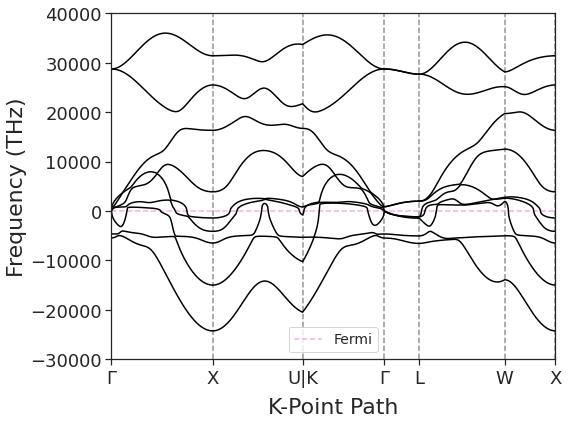

In [13]:
# Phonon Band Structure 
fig = plt.figure(figsize=(8,6))
bands = np.array(np.loadtxt('./plot-src/CeO2_DFTB_phononBAND.dat'))
fermi=0
kpath = [bands[0,0],bands[100,0],bands[201,0],bands[302,0],bands[403,0],bands[504,0],bands[605,0]]
plt.xticks(kpath,['\u0393','X','U|K','\u0393','L','W','X'],fontsize=18)
plt.vlines(kpath,-30000,40000,color=colors[7],linestyle='dashed')
plt.hlines(0,bands[0,0],bands[605,0],color=colors[6],linestyle='dashed',label='Fermi')
plt.plot(bands[:,0], bands[:,1:], color='k')
plt.xlabel('K-Point Path',  labelpad = 10,fontsize=22)
plt.ylabel('Frequency (THz)', labelpad = 3,fontsize=22)
plt.xlim(0,bands[605,0])
plt.ylim(-30000,40000)
plt.yticks(fontsize=18)
plt.legend(fontsize=14)
#plt.title('Cerium(IV) Oxide Phonon Band Structure Plot (DFTB)', fontsize=14)
plt.savefig('./plot-fig/CeO2_DFTB_phononBAND.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()#plt.close()#

Superimposed Phonon Band Struct (VASP and DFTB)

IndexError: list index out of range

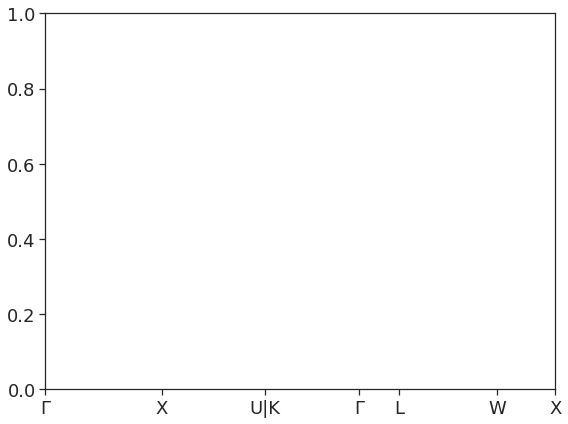

In [14]:
# superimposed phonon Band Structure plots
# to plot superimposed, normalize one axis, then plot the 'twin' version of the other axis, then hide the extra axis
scale = 15/30000 # 0.0005
fig, ax2 = plt.subplots(figsize=(8,6))
VASP_bands = np.array(np.loadtxt('./plot-src/CeO2_VASP_phononBAND.dat'))
DFTB_bands = np.array(np.loadtxt('./plot-src/CeO2_DFTB_phononBAND.dat'))

kpath = [DFTB_bands[0,0],DFTB_bands[100,0],DFTB_bands[201,0],DFTB_bands[302,0],DFTB_bands[403,0],DFTB_bands[504,0],DFTB_bands[605,0]]/DFTB_bands[605,0]
plt.xticks(kpath,['\u0393','X','U|K','\u0393','L','W','X'])
ax2.vlines(kpath[:],-15,0,color=colors[8],linestyle='dashed')
ax2.plot(DFTB_bands[0,0]/DFTB_bands[605,0], DFTB_bands[0,1]*scale, color=colors[0],linestyle='dashdot', label='DFTB')
ax2.plot(DFTB_bands[:,0]/DFTB_bands[605,0], DFTB_bands[:,1:]*scale, color=colors[0],linestyle='dashdot')
ax2.tick_params(axis='x')
#ax2.get_xaxis().set_visible(False) # hide the extra axes
plt.legend(loc=1)

ax1 = ax2.twiny()  # instantiate a second Axes that shares the same y-axis

kpath = [VASP_bands[0,0],VASP_bands[100,0],VASP_bands[201,0],VASP_bands[302,0],VASP_bands[403,0],VASP_bands[504,0],VASP_bands[605,0]]/VASP_bands[605,0]
ax1.set_xlabel('K-Point Path',  labelpad = 10,fontsize=12)
ax1.set_ylabel('Frequency (THz)', labelpad = 3,fontsize=12)
plt.xticks(kpath,['\u0393','X','U|K','\u0393','L','W','X'])
ax1.vlines(kpath[:],0,20,color=colors[7],linestyle='dashed')
ax1.plot(VASP_bands[0,0]/VASP_bands[605,0], VASP_bands[0,1], color='black',label='VASP')
ax1.plot(VASP_bands[:,0]/VASP_bands[605,0], VASP_bands[:,1:], color='black')
plt.legend(loc=2)

plt.hlines(0,VASP_bands[0,0]/VASP_bands[605,0],VASP_bands[605,0]/VASP_bands[605,0],color=colors[6],linestyle='dashed',label='Fermi')
#plt.xlim(VASP_bands[0,0],VASP_bands[605,0])
plt.ylim(-15,20)
plt.title('CeO2 Phonon Superimposed Band Structure Plot', fontsize=14)
plt.savefig('./plot-fig/CeO2_Superimposed_phononBAND.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()

Total Density of States (GFN)

In [ ]:
# GFN1 xTB TDOS
gfn1tdos = np.array(np.loadtxt('./plot-src/CeO2_GFN1_TDOS.dat'))
gfn1fermi =  ( -2.37 - (-10.16))/2 + -10.16 # midway between peaks -6.265
#gfn2tdos = np.array(np.loadtxt('./plot-src/Xe_GFN2_TDOS.dat'))
#gfn2fermi =  (-1.1990000000E+01 - (-1.8680000000E+01))/2 + (-1.8680000000E+01)# midway between peaks

fig = plt.figure(figsize=(8,6))
plt.plot(gfn1tdos[:,0]-gfn1fermi, gfn1tdos[:,1], color='g', label='GFN1')
#plt.plot(gfn2tdos[:,0]-gfn2fermi, gfn2tdos[:,1], color='purple',linestyle='dotted', label='GFN2')
plt.vlines(0,0,21.5,color=colors[6],linestyle='dashed', label='Fermi')

plt.xlabel('Energy (eV)')
plt.ylabel('a.u.')
plt.ylim(0,20)
plt.xlim(-22,5)
plt.legend()
plt.xlabel('DOS (a.u.)',  labelpad = 10,fontsize=22)
plt.ylabel('Energy (eV)', labelpad = 3,fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=14)
#plt.title('Cerium(IV) Oxide Total Density of States (GFN1-xTB)', fontsize=14)
plt.savefig('./plot-fig/CeO2_GFN1_TDOS.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show() #plt.close() #

In [ ]:
# GFN1 xTB TDOS
gfn1tdos = np.array(np.loadtxt('./plot-src/CeO2_GFN1_TDOS.dat'))
gfn1fermi =  ( -2.37 - (-10.16))/2 + -10.16 # midway between peaks -6.265

fig = plt.figure(figsize=(8,6))
plt.plot(gfn1tdos[:,0]-gfn1fermi, gfn1tdos[:,1], color='g', label='GFN1')

dos = np.array(np.loadtxt('./plot-src/CeO2_VASP_TDOS.dat'))
fermi = 0 #((-1.30344) -1.42856)/2 # vasp says -7.186082, this is fermi used for composite plot
plt.plot(dos[:,0]-fermi, dos[:,1], color='black',label='VASP')

plt.vlines(0,0,21.5,color=colors[6],linestyle='dashed', label='Fermi')

plt.xlabel('Energy (eV)')
plt.ylabel('a.u.')
plt.ylim(0,20)
plt.xlim(-22,5)
plt.legend()
plt.xlabel('DOS (a.u.)',  labelpad = 10,fontsize=22)
plt.ylabel('Energy (eV)', labelpad = 3,fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=14)
#plt.title('Cerium(IV) Oxide Total Density of States (Both))', fontsize=14)
#plt.savefig('./plot-fig/CeO2_GFN1_TDOS.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show() #plt.close() #

Band Structure (GFN)

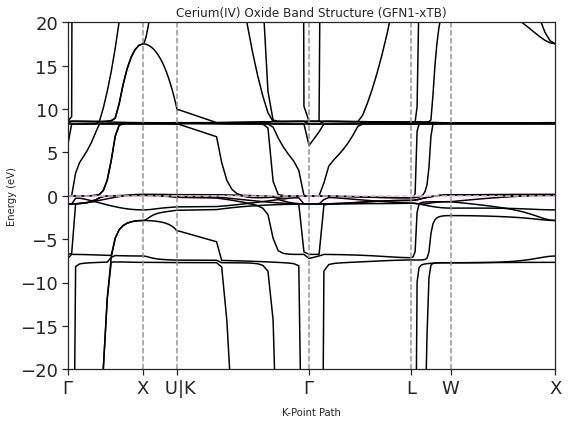

In [15]:
# Band Structure GFN1 NORMALIZED!!!
bands = np.array(np.loadtxt('./plot-src/CeO2_GFN1_BAND.dat'))
fermi = -10.4674 # from detailed.out
fig = plt.figure(figsize=(8,6))
# Γ—X—U|K—Γ—L—W—X 
kpts = [[0,0,0],[0.5,0,0.5],[0.625,0.25,0.625],[0.375,0.375,0.75],[0,0,0],[0.5,0.5,0.5],[0.5,0.25,0.75],[0,0,0]]
m = [1+19,20,1,19,20,20,20]
k = 0
kvecs = np.zeros(len(kpts)-1)
norm_kpath = np.zeros(len(bands[:,0]))
for i in range(len(kpts)-1):
    kvecs[i] = np.sqrt((kpts[i+1][0]-kpts[i][0])**2 + (kpts[i+1][1]-kpts[i][1])**2 + (kpts[i+1][2]-kpts[i][2])**2)
    for j in range(m[i]):
        norm_kpath[k] = kvecs[i]*(j+1)/20 + sum(kvecs[0:(i)])
        k += 1
kpath = [norm_kpath[0],norm_kpath[19],norm_kpath[39],norm_kpath[59],norm_kpath[79],norm_kpath[99],norm_kpath[119]]
plt.plot(norm_kpath, bands[:,1:]-(fermi), color='black')
plt.xticks(kpath,['$\Gamma$', 'X',' U|K', '$\Gamma$', 'L' ,'W' ,'X'])
plt.vlines(kpath[1:-1],-250,750,color=colors[7],linestyle='dashed')
plt.hlines(0,norm_kpath[0],norm_kpath[119],color=colors[6],linestyle='dashed',label='fermi')
plt.xlim(norm_kpath[0],norm_kpath[119])
plt.ylim(-20,20)
plt.xlabel('K-Point Path', labelpad = 10,fontsize=10)
plt.ylabel('Energy (eV)', labelpad = 3,fontsize=10)
plt.title('Cerium(IV) Oxide Band Structure (GFN1-xTB)', fontsize=12)
#plt.savefig('./plot-fig/CeO2_GFN1_BAND.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()